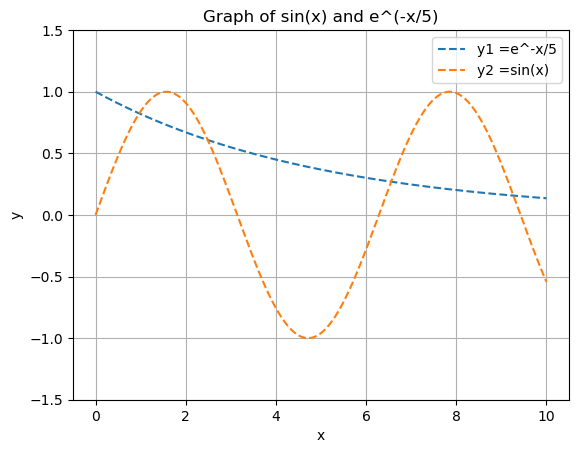

In [1]:
# 1 .a
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 600)
y1 = np.exp(-x/5)
y2 = np.sin(x)

plt.plot(x,y1,label=("y1 =e^-x/5") ,linestyle="--")
plt.plot(x,y2,label=("y2 =sin(x)"),linestyle="--")

plt.ylim(-1.5,1.5)

plt.xlabel("x")
plt.ylabel('y')
plt.title("Graph of sin(x) and e^(-x/5)")
plt.grid()
plt.legend()

In [1]:
# 1.b.

import numpy as np
def f(x):
    return np.exp(-x/5) - np.sin(x) 
    
def bisection(a,b,e):
    i = 1
    condition = True
    while condition:
        c = (a+b)/2

        if f(a)*f(c)<0:
            b = c
        else:
            a = c
        if abs(f(c))<e:
            condition = False
        i+=1
    return c , i
    
a = float(input("Enter the first guess value: "))
b = float(input("Enter the second guess value: "))
e = float(input("Tolerance is: "))

if f(a)*f(b)>0:
    print(f"No root in this interval: {(a,b)}")
else:
    c , i = bisection(a,b,e)
    print("No. of iteration : " , i)
    print("Approximate root : " ,round(c,8))
    

Enter the first guess value:  0
Enter the second guess value:  1
Tolerance is:  0.0000001


No. of iteration :  21
Approximate root :  0.96831989


In [2]:
# 1 .c. secant method/regula falsi
import numpy as np  

def f(x):
    return np.exp(-x/5) - np.sin(x)

def secant(a, b, e): 
    i = 0
    condition = True
    while condition:
        if (f(b)-f(a)) == 0:
            condition = False
            break
        else:
            c = b - ((b-a)/(f(b)-f(a)))*f(b)

            if abs(f(c)) < e:
                condition = False
            a,b=b,c
        i += 1
    return c ,i
    
def regula(a, b, e):
    i = 0
    condition = True
    while condition:
        if (f(b)-f(a)) == 0:
            condition = False
            break
        else:
            c = b - ((b-a)/(f(b)-f(a)))*f(b)

        if abs(f(c)) < e:
            condition = False
        i += 1 
        if f(a)*f(c) < 0: #check for false position
            b = c
        else:
            a = c     
    return c, i
    
a = float(input("Enter the first guess value: "))
b = float(input("Enter the second guess value: "))
e = float(input("Tolerance is: "))

if f(a)*f(b) > 0:
    print("No root in this interval")
else:
    print('-'*30)
    print('Bisection')
    c, i = bisection(a, b, e)  # This function is defined in a previous cell
    print(f'Number of iteration: {i} \nApproximate root : {c :.7f}')
    
    print('-'*30)
    print('Secant')
    c, i = secant(a, b, e)  
    print(f'Number of iteration: {i} \nApproximate root : {c :.7f}')
    
    print('-'*30)
    print('Regula Falsi')
    c, i = regula(a, b, e) 
    print(f'Number of iteration: {i} \nApproximate root : {c :.7f}')

Enter the first guess value:  0
Enter the second guess value:  1
Tolerance is:  0.0000001


------------------------------
Bisection
Number of iteration: 21 
Approximate root : 0.9683199
------------------------------
Secant
Number of iteration: 4 
Approximate root : 0.9683198
------------------------------
Regula Falsi
Number of iteration: 11 
Approximate root : 0.9683198


In [12]:
# 1 .d.
import sympy as s
import numpy as np

x = s.symbols('x')
m = float(input("Enter the  guess value: "))
e = float(input("Tolerance is: "))
def f(x):
    return s.exp(-x/5) - s.sin(x)

dydx = s.diff(f(x), x)
y_func = s.lambdify(x, f(x), "numpy")
dydx_func = s.lambdify(x, dydx, "numpy")

def raphson(m , e):
    i = 0
    condition = True
    while condition:
        dydx_value = dydx_func(m)  
        ym = y_func(m)
        
        if dydx_value != 0:
            c = m - ym/dydx_value 
            m = c
        else:
            print("Zerodivisor error")

        if abs(f(m)) < e:
            condition = False
        else:
            condition = True
        i +=1
    return m, i

print('-'*30)
print('newton raphson') 
m, i = raphson(m ,e)
print(f'Number of iteration: {i} \nApproximate root : {m :.7f}')

print('-'*30)
print('Regula Falsi')
m, i = regula(a, b, e)  # Assuming this function is defined in a previous cell
print(f'Number of iteration: {i}')

print('-'*30)
print('Secant')
c, i = secant(a, b, e)  # Assuming this function is defined in a previous cell
print(f'Number of iteration: {i}')

print('-'*30)
print('Bisection')
c, i = bisection(a, b, e)  # Assuming this function is defined in a previous cell
print(f'Number of iteration: {i}')

Enter the  guess value:  1
Tolerance is:  0.0000001


------------------------------
newton raphson
Number of iteration: 3 
Approximate root : 0.9683198
------------------------------
Regula Falsi
Number of iteration: 10
------------------------------
Secant
Number of iteration: 4
------------------------------
Bisection
Number of iteration: 20


In [3]:
 # 2.a) Fixed point iteration  -->
import numpy as np
def g(x):
    return (1+x)**(1/3)

def fixed_point(y,e):
    condition = True
    i = 0
    while condition:
        x = (1+y)**(1/3)
        if abs(x - y) < e:
            condition = False
        else:
            condition = True
        i+=1
        y = x
    print("Number of iteration: " ,i)
    return x

y = float(input("Enter the  guess value in interval [1,2]:"))
e = float(input("Tolerence is: "))
        
x = fixed_point(y,e)
print("Required root: ", round(x,7))

Enter the  guess value in interval [1,2]: 1
Tolerence is:  0.0000001


Number of iteration:  10
Required root:  1.3247179


In [26]:
 # 2.b) Fixed point iteration  -->
import math
g = lambda x: (2 - math.exp(x) + x**2) / 3

def fixed_point(y,e):
    condition = True
    i = 0
    while condition:
        x = (2 - math.exp(y) + y**2) / 3 
        if abs(x-y) < e:
            condition = False
        else:
            condition = True
        i+=1
        y = x
    print("Number of iteration: " ,i)
    return x

y = float(input("Take a Guess value in interval [0,1]:"))
e = float(input("Tolerence is: "))
        
x = fixed_point(y,e)
print("Required root: ", round(x,7))

Take a Guess value in interval in some [a,b]: 0
Tolerence is:  0.0000001


Number of iteration:  13
Required root:  0.2575303


In [10]:
# 3 a,b. same as 2nd but with different initial guess to check the speed
import numpy as np

def f1(x):
    return (1 + x)**(1/3)
def f2(x):
    return (2 - np.exp(x) + x**2) / 3

def fixed_point(g, y, tol):
    i = 0
    while True:
        x = g(y)
        if abs(x - y) < tol:
            break
        y = x
        i += 1
    print("Number of iterations:", i)
    return x

y1 = float(input("Enter initial guess for f(x) = (1 + x)^(1/3) in [1,2]: "))
y2 = float(input("Enter initial guess for f(x) = (2 - exp(x) + x^2)/3 in [0,1]: "))
tol = float(input("Enter tolerance: "))

print("\nf1(x) = (1 + x)^(1/3):")
root1 = fixed_point(f1, y1, tol)
print("Required root 1:", round(root1, 7))

print("\nf2(x) = (2 - exp(x) + x^2)/3:")
root2 = fixed_point(f2, y2, tol)
print("Required root 2:", round(root2, 7))

Enter initial guess for f(x) = (1 + x)^(1/3) in [1,2]:  1.3
Enter initial guess for f(x) = (2 - exp(x) + x^2)/3 in [0,1]:  0.2
Enter tolerance:  0.0000001



f1(x) = (1 + x)^(1/3):
Number of iterations: 8
Required root 1: 1.3247179

f2(x) = (2 - exp(x) + x^2)/3:
Number of iterations: 11
Required root 2: 0.2575303


In [ ]:
'''
Obeservation:
The Root is Identical:
                      For changing the initial guess (within the valid interval) did not change the final root.
                      Both guesses for (a) converged to 1.3247179, and both guesses for (b) converged to 0.2575303.
                      This confirms the root is unique.
The Number of Iterations Changed: 
                              The speed of convergence depends on how close the initial guess is to the final root.
                              For (a) y  = 1.3 (8 iterations) was slightly "closer" to the root than
                              y = 1 (10 iterations), so it converged two step faster.
                              For (b) y = 0.2 (11 iterations) was slightly "closer" to the root than
                              y =0 (13 iterations), so it converged two step faster.
'''